In [1]:
test_csv = 'predict.csv' #Путь к файлу с данными

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(test_csv)
print('Число уникальных предсказываемых значений в датасете :', len(data.c5.unique()))
display(data) #вид данных
data.describe() #основные статистики по столбцам

Число уникальных предсказываемых значений в датасете : 43


,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,authors_mean_sociality,authors_mean_pagerank,authors_mean_productivity,journal_pagerank,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality
0,16,1.0,-0.425436,500.0,1.0,1.0,6.0,NaN,NaN,NaN,101.0,66,1653,7,1.0,1.945910
1,8,7.0,-0.571967,134.0,1.0,1.0,6.0,NaN,NaN,NaN,24.0,59,1527,7,32.0,1.945910
2,15,19.0,-0.859644,235.0,1.0,1.0,5.0,NaN,NaN,NaN,49.0,169,1554,6,5.0,1.791759
3,6,4.0,-1.054999,1124.0,1.0,1.0,10.0,NaN,NaN,NaN,185.0,130,2121,11,7.0,2.397895
4,14,2.0,-0.476697,346.0,1.0,1.0,2.0,NaN,NaN,NaN,72.0,100,432,3,7.0,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,25,6.0,-0.330948,528.0,0.0,0.0,6.0,NaN,NaN,NaN,140.0,62,645,7,0.0,1.945910
475,6,12.0,-1.493480,2145.0,0.0,0.0,1.0,NaN,NaN,NaN,416.0,45,714,2,0.0,0.693147
476,24,17.0,-1.466320,551.0,0.0,0.0,4.0,NaN,NaN,NaN,146.0,84,0,5,0.0,1.609438
477,24,6.0,-1.556737,551.0,0.0,0.0,0.0,NaN,NaN,NaN,146.0,56,0,1,0.0,0.000000


,recency,topic_rank,diversity,authors_mean_rank,authors_mean_hindex,authors_mean_gindex,authors_mean_sociality,authors_mean_pagerank,authors_mean_productivity,journal_pagerank,journal_rank,title_len,abstract_len,n_authors,c5,log_authors_mean_sociality
count,479.000000,479.000000,479.000000,473.000000,473.000000,473.000000,473.000000,0.0,0.0,0.0,440.000000,479.000000,479.000000,479.000000,479.000000,473.000000
mean,13.419624,10.125261,-0.675481,741.769615,0.844051,0.844668,3.411132,NaN,NaN,NaN,146.184091,94.983299,1162.283925,4.369520,6.713987,1.264066
std,5.860415,5.748655,0.606013,581.948922,0.363961,0.364351,2.790555,NaN,NaN,NaN,111.398299,38.524238,657.597003,2.800775,12.547968,0.703466
min,5.000000,1.000000,-2.995732,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,16.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,5.000000,-1.087146,265.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,53.750000,68.000000,758.500000,2.000000,0.000000,0.693147
50%,13.000000,10.000000,-0.526332,596.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,122.000000,91.000000,1197.000000,4.000000,2.000000,1.386294
75%,18.000000,15.000000,-0.150066,1141.000000,1.000000,1.000000,5.000000,NaN,NaN,NaN,216.750000,116.500000,1587.500000,6.000000,8.000000,1.791759
max,25.000000,20.000000,-0.056685,2336.000000,1.125000,1.166667,15.000000,NaN,NaN,NaN,436.000000,279.000000,3655.000000,16.000000,154.000000,2.772589


In [4]:
nan_value = float("NaN") 
data.replace("", nan_value, inplace=True) 
data.dropna(how='all', axis=1, inplace=True) #удалить пустые столбцы
data.dropna(how='any', axis=0, inplace=True) #удалить строки с пропущенными признаками
data.drop_duplicates(inplace=True)  #удалить дубликаты

In [5]:
X = data.drop('c5', axis = 1).to_numpy() #матрица признаков
y = data['c5'].to_numpy() #вектор ответов

In [6]:
def crossValidation(X, y, cvFolds, estimator):
    '''Returns R2 score on consecutive folds.
    Parameters: 
    X (array-like): Training data 
    y (array-like): Target variable
    cvFolds (int): Folds number. Must be at least 2. 
    estimator (sklearn.ensemble class): scikit-learn estimators 
    Returns: 
    list: list of R2-score 
    
    '''
    r2 = np.zeros((cvFolds,1))   
    kf = KFold(n_splits=cvFolds, shuffle=True)
    cv_j=0    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train,y_train)
        y_true, y_pred = y_test,estimator.predict(X_test)
        r2[cv_j] = r2_score(y_true, y_pred) 
        cv_j = cv_j + 1
    return r2

In [7]:
cv_list = [] #значения точности модели при кросс-валидации
for n_tree in range(10,100):
    clf = RandomForestRegressor(n_estimators=n_tree) #модель случайный лес с n_tree деревьями
    cv_list = crossValidation(X, y, 5, clf) #точность оценивается по 5 выборкам
    print(n_tree, ':', *cv_list)
    if np.average(cv_list)>0.5: 
        print(np.average(cv_list)) #среднее значение точности > 0.5
        break
print(n_tree) #параметр модели для заданной точности

10 : [0.43340197] [0.39803292] [0.66649986] [0.65336241] [-0.90718362]
11 : [0.6175999] [0.33939741] [0.70696817] [0.08075682] [0.48085858]
12 : [0.54440146] [-1.82707733] [0.67723243] [0.42722098] [0.62731848]
13 : [0.70461845] [0.69664736] [0.73010925] [0.71294662] [0.38711962]
0.6462882597215203
13


In [8]:
x_significance = [] #значения важности для признаков
for n_x in range(len(X[1])):
    X_new = data.drop(['c5',data.drop('c5', axis = 1).columns[n_x]], axis = 1).to_numpy()
    cv_list = crossValidation(X_new, y, 5, clf)
    x_significance.append(np.average(cv_list)) #признаки также оцениваются по R2 на 5 подвыборках

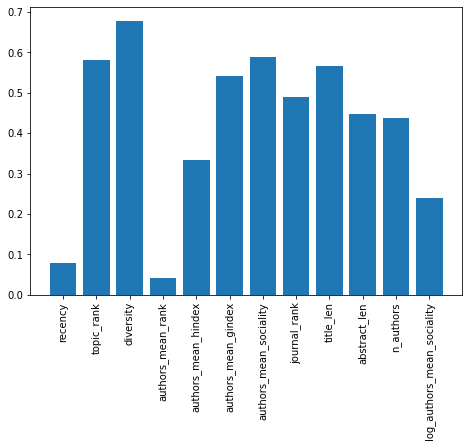

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(data.drop('c5', axis = 1).columns, x_significance)
plt.show()